## Normalization using min-max Scalar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("wine_data.csv")

In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
df.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [5]:
df = df.iloc[:, 0:3]

In [6]:
df.head()

,1,14.23,1.71
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


In [7]:
df.columns = ["Class label", "Alcohol", "Malic acid"]

In [8]:
df.head()

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


# But this thing deleted my first columns and if we want to start from begining we can give name as headers

In [11]:

df = pd.read_csv("wine_data.csv", header=None, usecols=[0,1,2])
df.columns = ["Class label", "Alcohol", "Malic acid"]

In [12]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [13]:
df.shape

(178, 3)

<Axes: xlabel='Alcohol', ylabel='Density'>

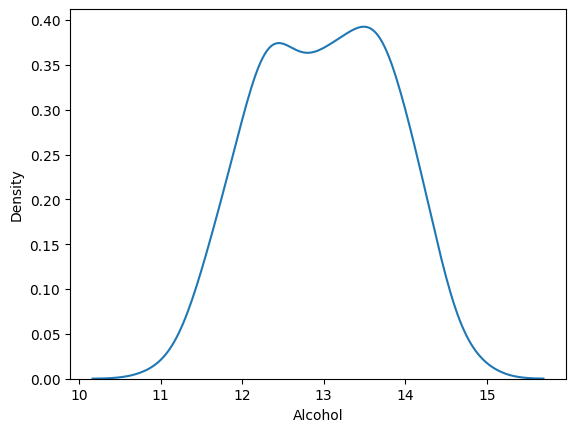

In [14]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

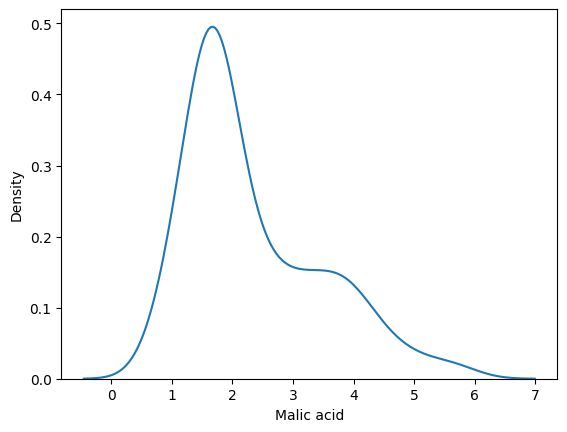

In [16]:
sns.kdeplot(df["Malic acid"])

(array([18., 59., 33., 16., 14., 11., 14.,  7.,  3.,  3.]),
 array([0.74 , 1.246, 1.752, 2.258, 2.764, 3.27 , 3.776, 4.282, 4.788,
        5.294, 5.8  ]),
 <BarContainer object of 10 artists>)

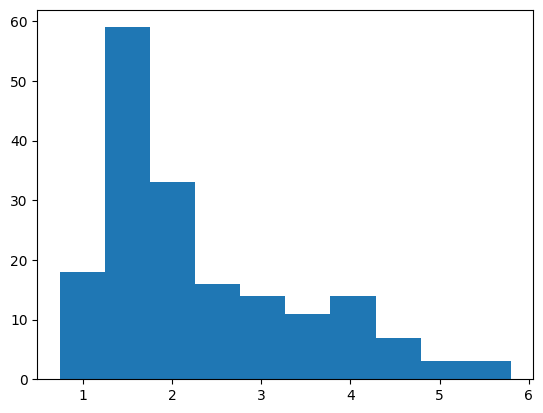

In [18]:
plt.hist(df['Malic acid'], bins=10)

In [25]:
df["Class label"].value_counts()

,count
Class label,
2,71
1,59
3,48


([<matplotlib.patches.Wedge at 0x7a2e32406b30>,
 [Text(0.3436094134029147, 1.0449557746722609, 'Class 2'),
  Text(-1.0106064575192055, -0.4343668818182187, 'Class 1'),
  Text(0.7283164304833661, -0.824351367493236, 'Class 3')],
 [Text(0.18742331640158982, 0.5699758770939605, '39.89%'),
  Text(-0.5512398859195666, -0.23692739008266472, '33.15%'),
  Text(0.39726350753638145, -0.44964620045085596, '26.97%')])

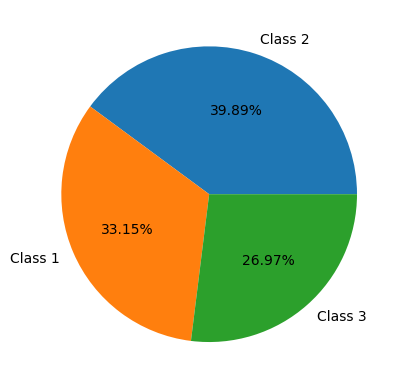

In [37]:
plt.pie(df["Class label"].value_counts(),labels=["Class 2", "Class 1", "Class 3"] ,autopct ='%0.2f%%')

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

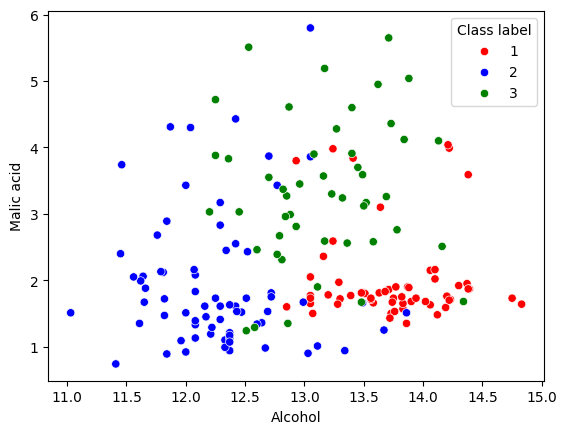

In [38]:
color_dict = {1:"red", 2:"blue", 3: "green"}
sns.scatterplot(x=df["Alcohol"],y=df["Malic acid"], hue=df["Class label"], palette=color_dict)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class label", axis =1 ),df["Class label"],
                                                     test_size= 0.3 , random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to train_set it will learn the parameters
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [46]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [47]:
X_train.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [49]:

np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


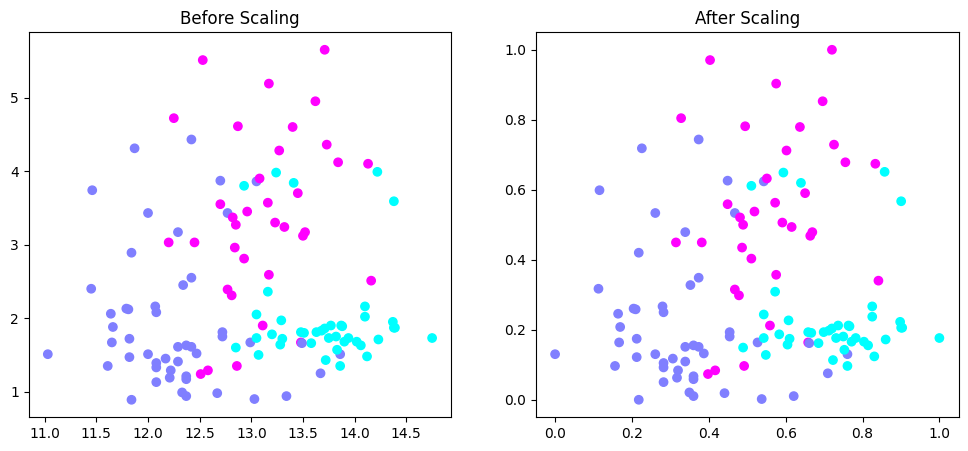

In [55]:
fig,  (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train["Alcohol"], X_train["Malic acid"], c=y_train,cmap="cool")
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Alcohol"], X_train_scaled["Malic acid"], c=y_train,cmap="cool")
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

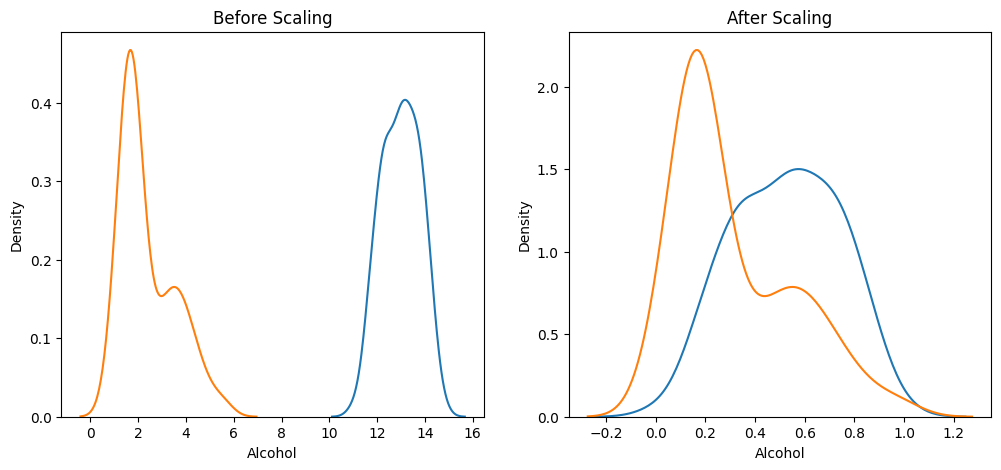

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Alcohol"], ax=ax1)
sns.kdeplot(X_train["Malic acid"], ax=ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Alcohol"], ax=ax2)
sns.kdeplot(X_train_scaled["Malic acid"], ax=ax2)

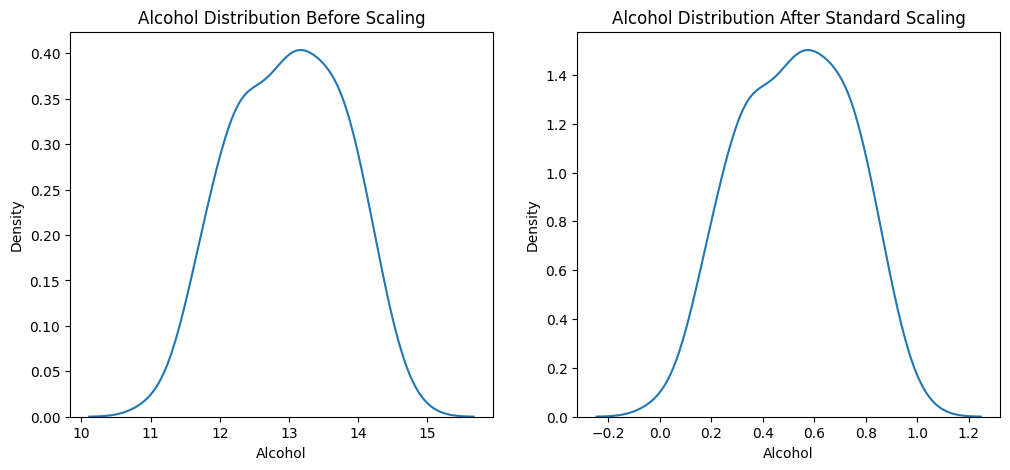

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()